In [ ]:
import os
import pandas as pd
import numpy as np

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import random

# Visualization
import matplotlib
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go

In [ ]:
import pandas as pd
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Read the CSV file

crop = pd.read_csv(r"Crop_recommendation.csv")
crop.head()

Saving crop recommendation.csv to crop recommendation (1).csv


FileNotFoundError: [Errno 2] No such file or directory: 'Crop_recommendation.csv'

In [ ]:
import pandas as pd
from google.colab import files

# Upload CSV file
uploaded = files.upload()

# Read the CSV file, accessing it from the 'uploaded' dictionary using the correct filename
crop = pd.read_csv(next(iter(uploaded))) # using next(iter()) to get the first key which represents the filename
# or you can access it using uploaded['crop recommendation (1).csv'] if name is known
crop.head()

Saving crop recommendation.csv to crop recommendation (2).csv


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
corr=crop.drop(['label'],axis=1).corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
crop.duplicated().sum()

np.int64(0)

In [ ]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [ ]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [ ]:
features = crop.columns.to_list()
features.remove('label')
print(features)

['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


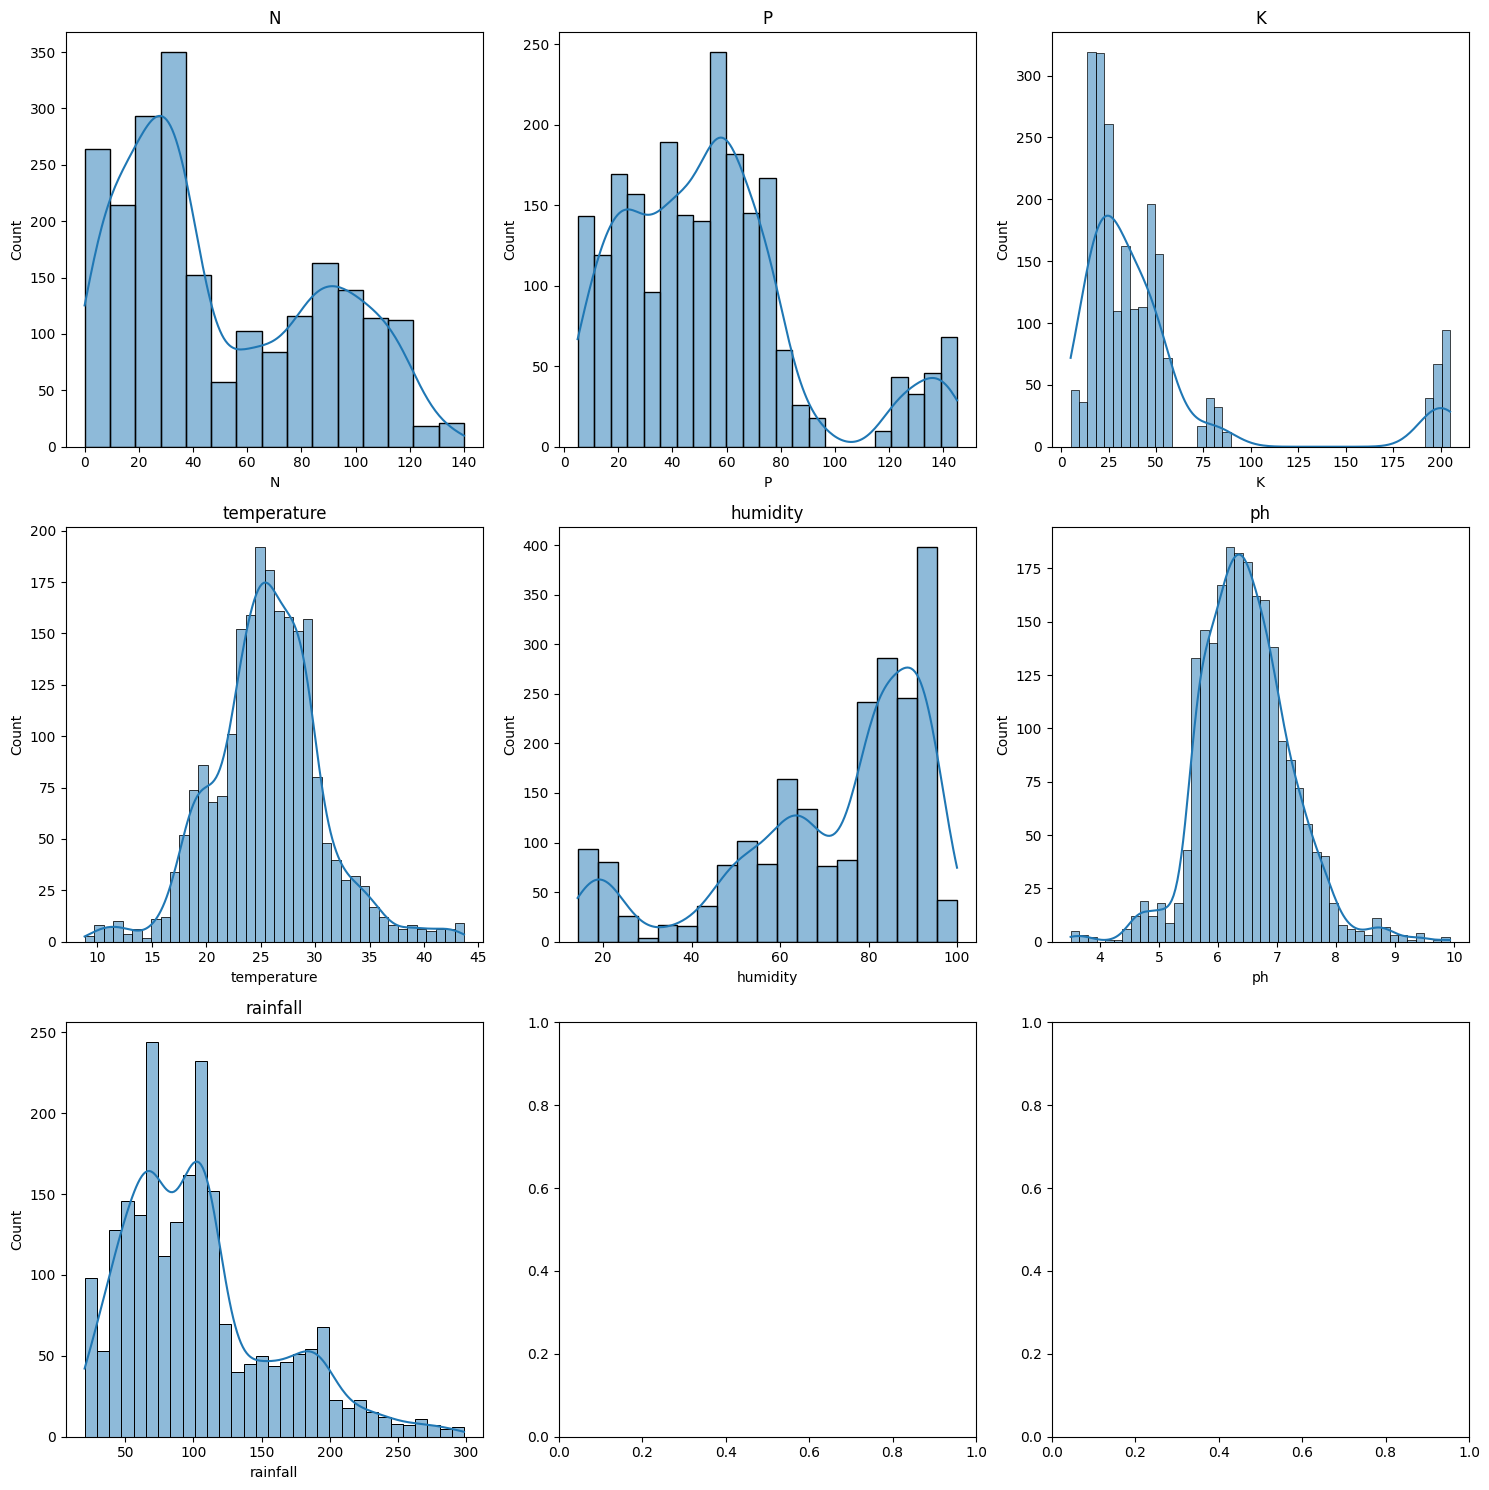

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.histplot(crop[i], ax=subplot, kde=True)
    subplot.set_title(i)
plt.tight_layout()
plt.show()

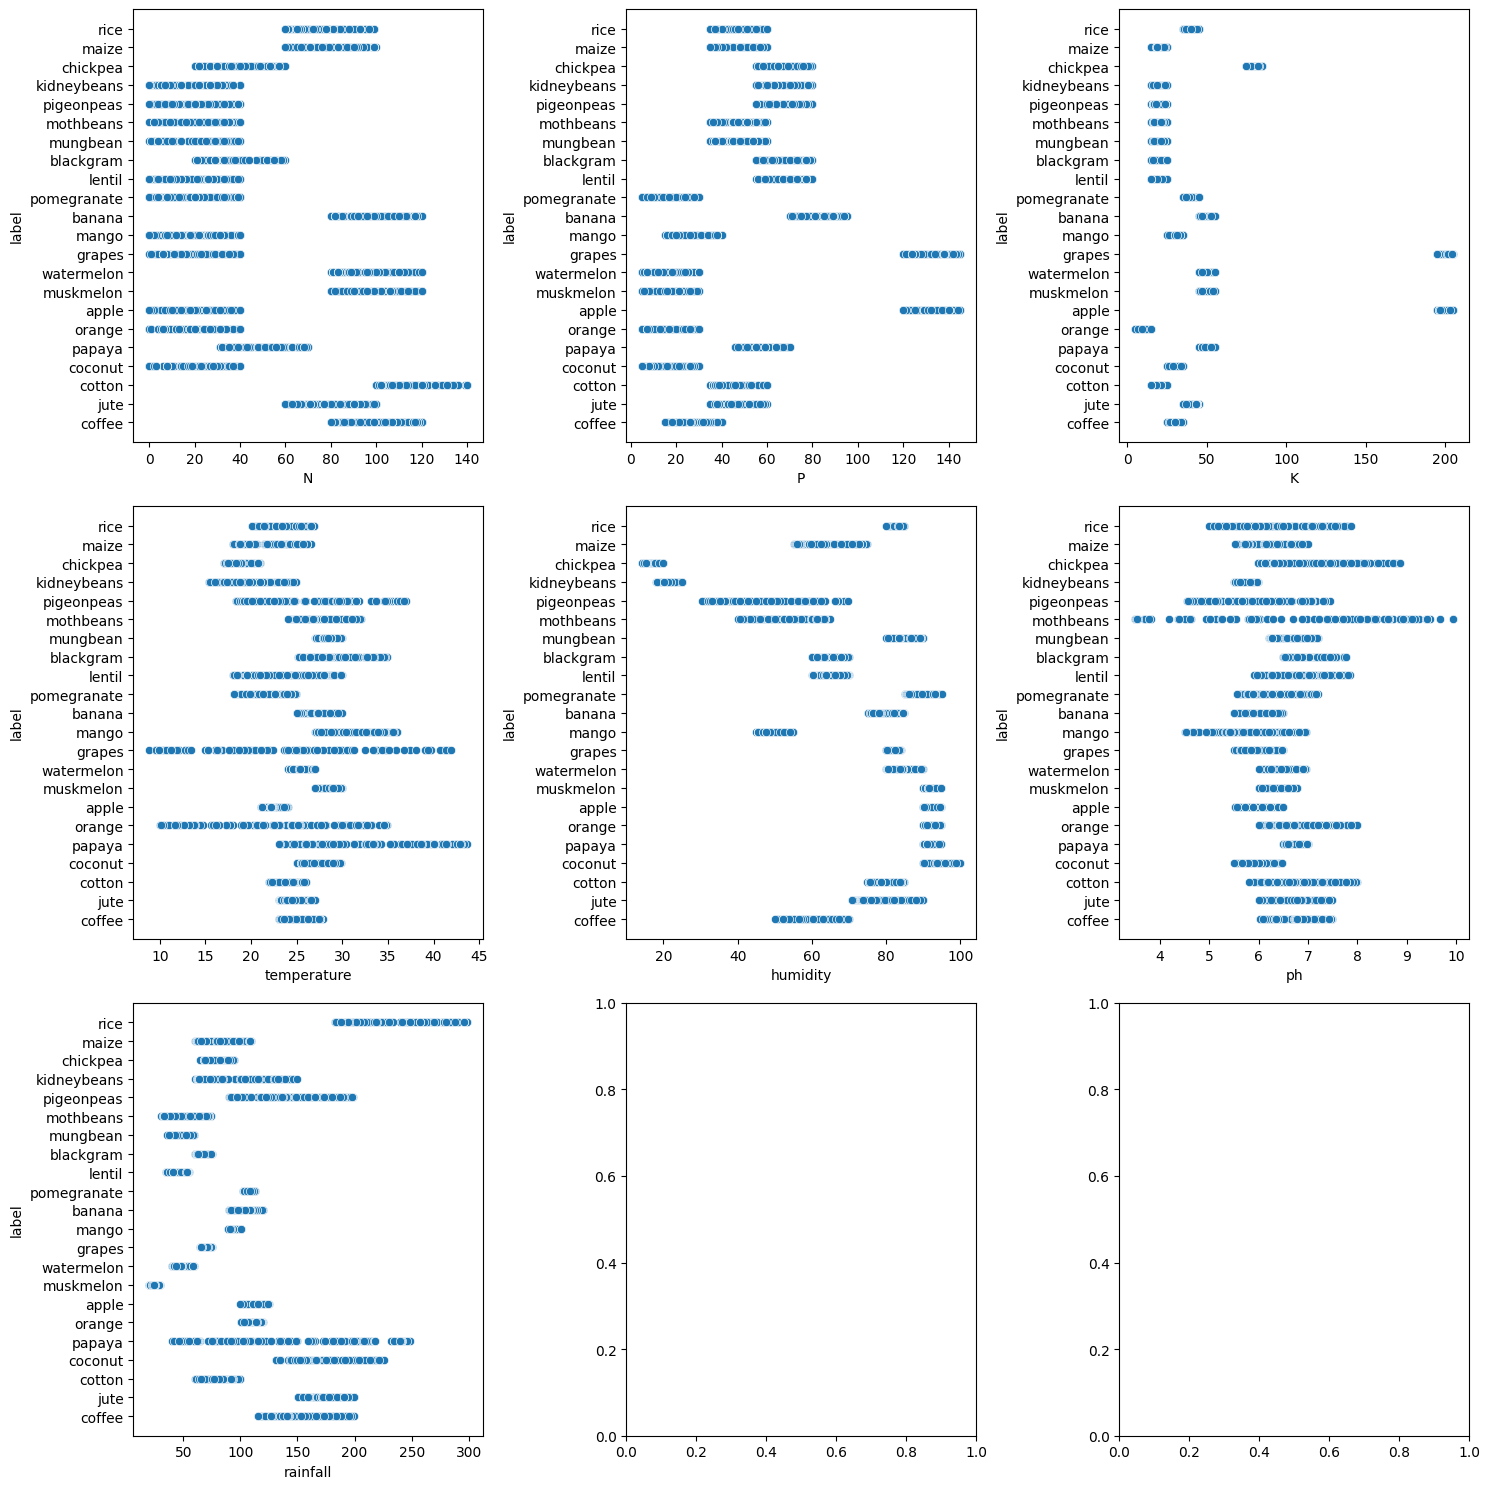

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.scatterplot(x=i, y='label', data=crop, ax=subplot)
plt.tight_layout()
plt.show()

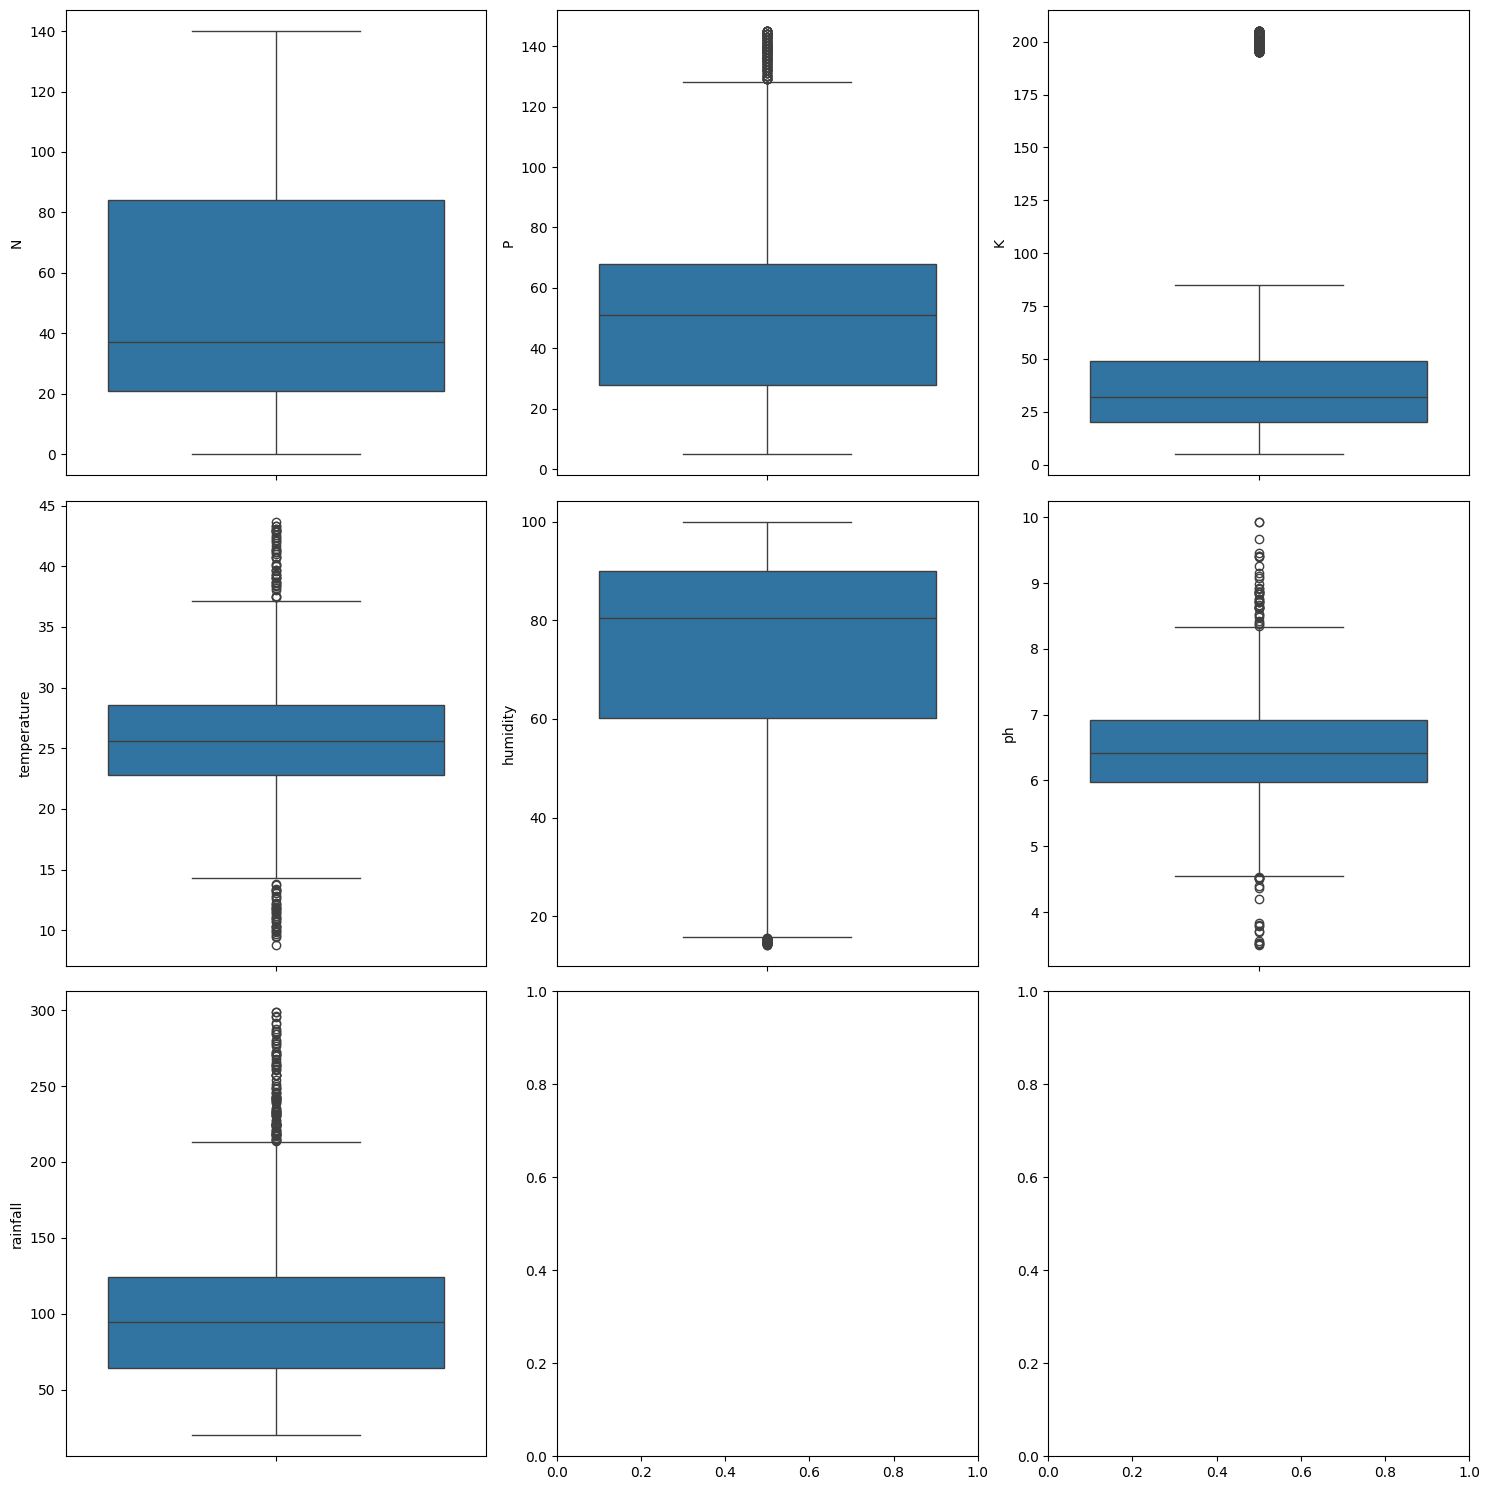

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for i, subplot in zip(features, ax.flatten()):
    sns.boxplot(crop[i], ax=subplot)
plt.tight_layout()
plt.show()

In [ ]:
numeric_columns = crop.select_dtypes(include=[np.number])
corr = numeric_columns.corr()
corr

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


from matplotlib import pyplot as plt
corr['N'].plot(kind='hist', bins=20, title='N')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['P'].plot(kind='hist', bins=20, title='P')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['K'].plot(kind='hist', bins=20, title='K')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['temperature'].plot(kind='hist', bins=20, title='temperature')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='N', y='P', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='P', y='K', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='K', y='temperature', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr.plot(kind='scatter', x='temperature', y='humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
corr['N'].plot(kind='line', figsize=(8, 4), title='N')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr['P'].plot(kind='line', figsize=(8, 4), title='P')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr['K'].plot(kind='line', figsize=(8, 4), title='K')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
corr['temperature'].plot(kind='line', figsize=(8, 4), title='temperature')
plt.gca().spines[['top', 'right']].set_visible(False)

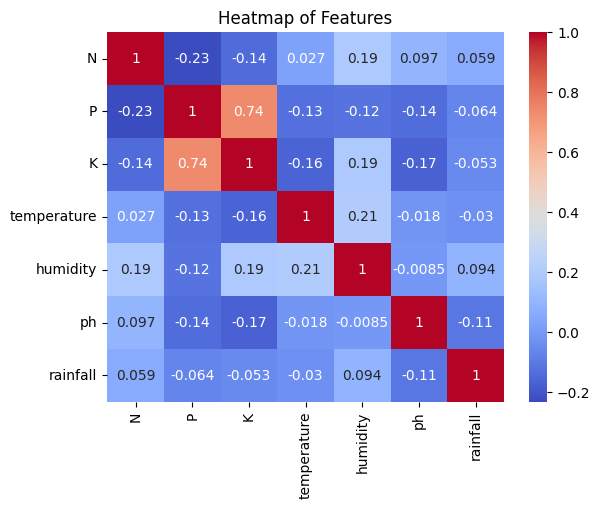

In [ ]:
import seaborn as sns
sns.heatmap(corr,annot=True,cbar=True,cmap='coolwarm')
plt.title("Heatmap of Features")
plt.show()

In [ ]:
crop_dict = {
'rice':1,
'maize':2,
'jute':3,
'cotton':4,
'coconut':5,
'papaya':6,
'orange':7,
'apple':8,
'muskmelon':9,
'watermelon':10,
'grapes':11,
'mango':12,
'banana':13,
'pomegranate':14,
'lentil':15,
'blackgram':16,
'mungbean':17,
'mothbeans':18,
'pigeonpeas':19,
'kidneybeans':20,
'chickpea':21,
'coffee': 22,
}

In [ ]:
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [ ]:
crop['label'].value_counts()

,count
label,
rice,100
maize,100
chickpea,100
kidneybeans,100
pigeonpeas,100
mothbeans,100
mungbean,100
blackgram,100
lentil,100


In [ ]:
crop.drop('label',axis=1,inplace=True)
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293
2199,104,18,30,23.603016,60.396475,6.779833,140.937041


In [ ]:
x = crop.drop('crop_no',axis=1)
y = crop['crop_no']

print(f"The shape of x is : {x.shape}")
print(f"The shape of y is : {y.shape}")

KeyError: "['crop_no'] not found in axis"

In [ ]:
x = crop.drop(crop.columns[0], axis=1) # Assuming 'crop_no' is the first column
y = crop[crop.columns[0]] # Assuming 'crop_no' is the first column

print(f"The shape of x is : {x.shape}")
print(f"The shape of y is : {y.shape}")

The shape of x is : (2200, 6)
The shape of y is : (2200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of x_train: (1760, 6)
Shape of y_train: (1760,)
Shape of x_test: (440, 6)
Shape of y_test: (440,)


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# intialize the DecisionTree Classifier
DT = DecisionTreeClassifier()
# Train the model
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = DT.predict(x_test)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_test,y_pred)}")

# evaluate the model on train dataset
y_pred_train = DT.predict(x_train)
print(f"Accuracy score of Decision Tree Classifier is: {accuracy_score(y_train,y_pred_train)}")

Accuracy score of Decision Tree Classifier is: 0.006818181818181818
Accuracy score of Decision Tree Classifier is: 1.0


In [ ]:
def crop_recommend(N,P,K,temperature,humidity,ph,rainfall):
    features = np.array([[N,P,K,temperature,humidity,ph,rainfall]])
    transformed_features = sc.transform(features)
    prediction = DT.predict(transformed_features).reshape(1,-1)
    crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut",
                 6: "Papaya", 7: "Orange", 8: "Apple", 9: "Muskmelon", 10: "Watermelon",
                 11: "Grapes", 12: "Mango", 13: "Banana", 14: "Pomegranate", 15: "Lentil",
                 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",19: "Pigeonpeas",
                 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
    crop = [crop_dict[i] for i in prediction[0]]


    return f"{crop} is a best crop to be cultivated "
# Predicting the crop for the given environment
N = 122
P = 49
K = 13
temperature = 29
humidity = 42
ph = 6.1
rainfall = 202

crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 7 features, but StandardScaler is expecting 6 features as input.

In [ ]:
def crop_recommend(P,K,temperature,humidity,ph,rainfall): # Removed N from the function's input
    features = np.array([[P,K,temperature,humidity,ph,rainfall]]) # Removed N from feature creation
    transformed_features = sc.transform(features)
    prediction = DT.predict(transformed_features).reshape(1,-1)
    crop_dict = {1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut",
                 6: "Papaya", 7: "Orange", 8: "Apple", 9: "Muskmelon", 10: "Watermelon",
                 11: "Grapes", 12: "Mango", 13: "Banana", 14: "Pomegranate", 15: "Lentil",
                 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",19: "Pigeonpeas",
                 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"}
    crop = [crop_dict[i] for i in prediction[0]]


    return f"{crop} is a best crop to be cultivated "
# Predicting the crop for the given environment
#N = 122 # N is removed
P = 49
K = 13
temperature = 29
humidity = 42
ph = 6.1
rainfall = 202

crop_recommend(P,K,temperature,humidity,ph,rainfall) # Invoking with the updated set of arguments

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


"['Kidneybeans'] is a best crop to be cultivated "

In [ ]:
import pickle
pickle.dump(DT, open('crop_model.sav', 'wb'))

# Save the scaler
pickle.dump(sc, open('crop_scaler.sav', 'wb'))


In [ ]:
N = 90
P = 42
K = 43
temperature = 20
humidity = 82
ph = 6.1
rainfall = 202

crop_recommend(N,P,K,temperature,humidity,ph,rainfall)

TypeError: crop_recommend() takes 6 positional arguments but 7 were given